# Handwritten Digit Recognition

## 1 - Packages

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from utils import *
%matplotlib inline

## 2 - MNIST Dataset

### 2.1 Load the MNIST Dataset

The shape of train dataset: torch.Size([60000, 28, 28])
The shape of test dataset: torch.Size([10000, 28, 28])


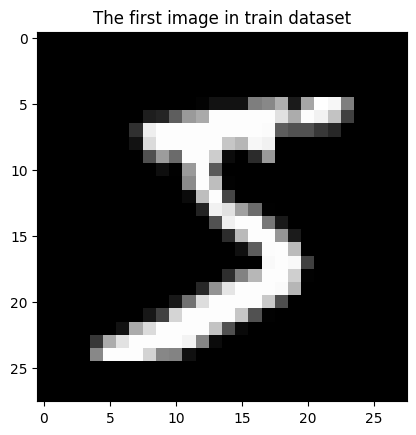

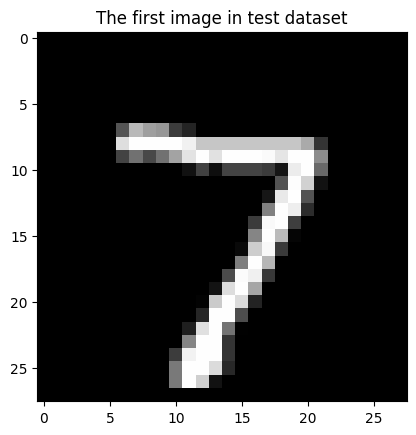

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = torchvision.datasets.MNIST(root='./', train=True, download=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./', train=False, download=False, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print('The shape of train dataset:', train_dataset.data.shape)
print('The shape of test dataset:', test_dataset.data.shape)

plt.imshow(train_dataset.data[0], cmap='gray')
plt.title('The first image in train dataset')
plt.show()

plt.imshow(test_dataset.data[0], cmap='gray')
plt.title('The first image in test dataset')
plt.show()

### 2.2 Visualize the MNIST Dataset

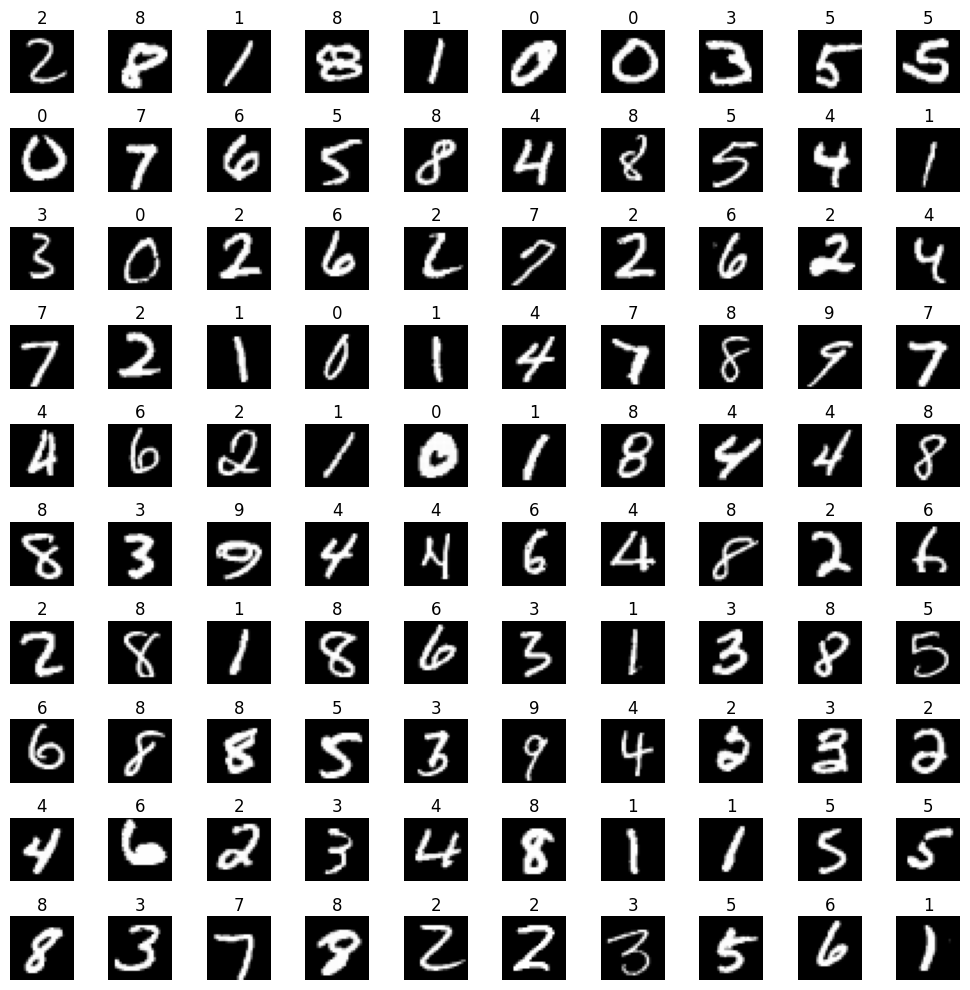

In [3]:
visualize_MNIST_dataset(train_loader)

## 3 - Neural Networks Model

### 3.1 Define Neural Networks Model

In [4]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(784, 25)
        self.fc2 = nn.Linear(25, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = MyModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print('The parameters of the model:')
for name, param in model.named_parameters():
    print(name, param.shape)
total_params = sum(p.numel() for p in model.parameters())
print('total_params', total_params)

The parameters of the model:
fc1.weight torch.Size([25, 784])
fc1.bias torch.Size([25])
fc2.weight torch.Size([15, 25])
fc2.bias torch.Size([15])
fc3.weight torch.Size([10, 15])
fc3.bias torch.Size([10])
total_params 20175


### 3.2 Train Neural Networks Model

In [5]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            average_loss = running_loss / 100
            print('[Epoch: %d, Mini-batch: %d] Average Loss: %.5f' % (epoch + 1, i + 1, average_loss))
            running_loss = 0.0

    print('Epoch %d completed. Average Loss: %.5f' % (epoch + 1, running_loss / len(train_loader)))

[Epoch: 1, Mini-batch: 100] Average Loss: 1.39171
[Epoch: 1, Mini-batch: 200] Average Loss: 0.46468
[Epoch: 1, Mini-batch: 300] Average Loss: 0.36643
[Epoch: 1, Mini-batch: 400] Average Loss: 0.33119
[Epoch: 1, Mini-batch: 500] Average Loss: 0.29482
[Epoch: 1, Mini-batch: 600] Average Loss: 0.26256
[Epoch: 1, Mini-batch: 700] Average Loss: 0.24110
[Epoch: 1, Mini-batch: 800] Average Loss: 0.25612
[Epoch: 1, Mini-batch: 900] Average Loss: 0.22813
Epoch 1 completed. Average Loss: 0.00862


### 3.3 Test Neural Networks Model

Accuracy of the network on the test dataset: 93%


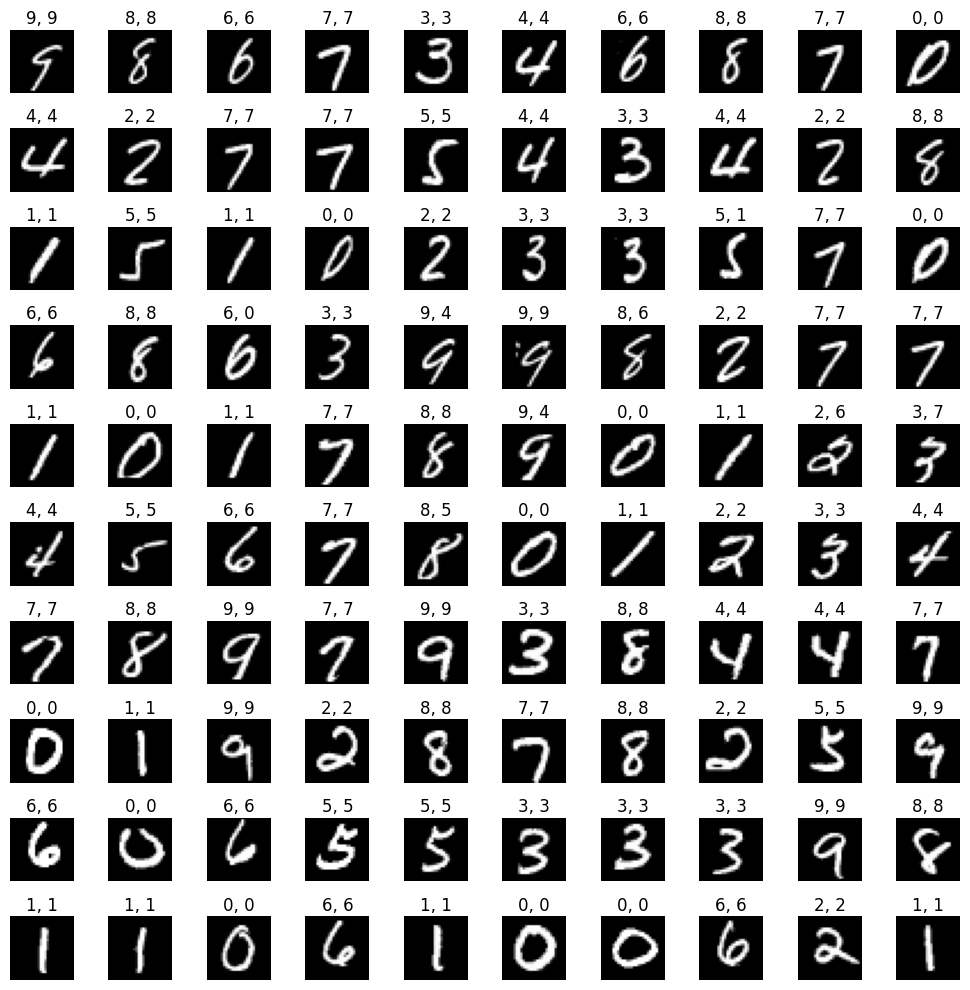

In [6]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test dataset: %d%%' % (100 * correct / total))

visualize_prediction_results(model, test_loader)

### 3.4 Compute Loss

Average loss on the test dataset: 0.00306


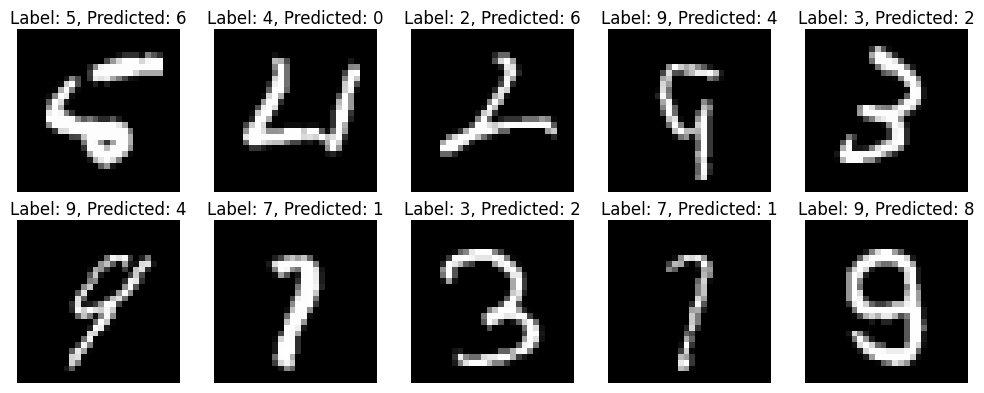

In [10]:
test_loss = 0.0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        total += labels.size(0)

print('Average loss on the test dataset: %.5f' % (test_loss / total))

visualize_incorrect_predictions(model, test_loader)